<a href="https://colab.research.google.com/github/wayamhui/ISYS5002_portfolio/blob/main/asx_stock_returns_steps_20486978.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will:

* Download prices
* Calculate Returns
* Calculate mean and standard deviation of returns

Lets load the modules first.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

Work around as Yahoo FInance made a change causing error with Pandas Datareader 


In [2]:
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

     |████████████████████████████████| 6.3 MB 14.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=1b87b7d056880008f7285de7ec1d53736c45c33c4887ec18d22b4038e7aba7fc
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Step 1: Specify date range for analysis 

Here we begin by creating start and end dates using pythons datetime module. 

In [3]:
help(pdr.get_data_yahoo)
start = "2009-01-01"
end = "2021-09-15"




Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' or 'column' (de

## Step 2: Select the stocks/tickers you would like to analyse

For Australian stocks, yahoo tickers require '.AX' to be specified at the end of the ticker symbol.  For other tickers use the search bar in yahoo finance.

In [4]:
tickers = [ 'NAB.AX','CBA.AX' ]

# Step 3: call the Pandas_Datareader DataReader module

In [5]:
df = pdr.get_data_yahoo(tickers,start,end)  # please pay attention to spelling, df refers to datafile

print(df.head())
df.tail(10)

[*********************100%***********************]  2 of 2 completed
            Adj Close                Close  ...       Open     Volume           
               CBA.AX    NAB.AX     CBA.AX  ...     NAB.AX     CBA.AX     NAB.AX
Date                                        ...                                 
2009-01-02  14.494560  8.887322  29.042646  ...  19.929367  2269780.0  2572210.0
2009-01-05  14.196730  8.813264  28.445881  ...  19.691547  2908531.0  2822855.0
2009-01-06  14.628587  9.035445  29.311192  ...  19.624958  2564247.0  3803343.0
2009-01-07  14.370466  9.100793  28.793995  ...  19.853266  3413898.0  4676568.0
2009-01-08  14.176877  9.087725  28.406096  ...  19.501291  3969963.0  2949396.0

[5 rows x 12 columns]


Adj Close                  Close  ...       Open     Volume           
                CBA.AX     NAB.AX      CBA.AX  ...     NAB.AX     CBA.AX     NAB.AX
Date                                           ...                                 
2021-09-02  101.370003  28.490000  101.370003  ...  28.400000  1887736.0  5917605.0
2021-09-03  101.839996  28.700001  101.839996  ...  28.500000  1604540.0  6780611.0
2021-09-06  102.160004  28.860001  102.160004  ...  28.510000  1458446.0  4803166.0
2021-09-07  102.139999  28.670000  102.139999  ...  28.799999  1332462.0  3677009.0
2021-09-08  102.919998  28.850000  102.919998  ...  28.450001  2118352.0  5225645.0
2021-09-09  100.550003  28.400000  100.550003  ...  28.680000  2468569.0  6209123.0
2021-09-10  101.089996  28.450001  101.089996  ...  28.650000  1995586.0  4490010.0
2021-09-13  101.300003  28.180000  101.300003  ...  28.250000  1119691.0  4081323.0
2021-09-14  101.580002  28.230000  101.580002  ...  28.299999  2114634.0  5473211.0
2021-09-15  101.410004  28.139999  101.410004  ...  28.010000  1668541.0  4458631.0

[10 rows x 12 columns]

## Step 4: Understanding the pandas dataframe structure

A good way to quickly understand how a pandas dataframe is structured is to look at the index and the columns.

In [6]:
df.index, df.columns, df.head()  # putting in same line can output whole line (as only last line will be output in python)

(DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
                '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
                '2009-01-14', '2009-01-15',
                ...
                '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
                '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
                '2021-09-14', '2021-09-15'],
               dtype='datetime64[ns]', name='Date', length=3214, freq=None),
 MultiIndex([('Adj Close', 'CBA.AX'),
             ('Adj Close', 'NAB.AX'),
             (    'Close', 'CBA.AX'),
             (    'Close', 'NAB.AX'),
             (     'High', 'CBA.AX'),
             (     'High', 'NAB.AX'),
             (      'Low', 'CBA.AX'),
             (      'Low', 'NAB.AX'),
             (     'Open', 'CBA.AX'),
             (     'Open', 'NAB.AX'),
             (   'Volume', 'CBA.AX'),
             (   'Volume', 'NAB.AX')],
            ),
             Adj Close                Close  ...      

## Step 5: Access useful attributes easily

We are interested in the closing price information for all of these stocks.

In [7]:
print (df['Close'])  # same as df.Close in this case
df.Close
close = df.Close  # optional to create a short name

                CBA.AX     NAB.AX
Date                             
2009-01-02   29.042646  19.406162
2009-01-05   28.445881  19.244446
2009-01-06   29.311192  19.729599
2009-01-07   28.793995  19.872292
2009-01-08   28.406096  19.843754
...                ...        ...
2021-09-09  100.550003  28.400000
2021-09-10  101.089996  28.450001
2021-09-13  101.300003  28.180000
2021-09-14  101.580002  28.230000
2021-09-15  101.410004  28.139999

[3214 rows x 2 columns]


## Step 6: Gain insights quickly with pandas describe method


In [8]:
# df.Close.describe()
df.Close.describe(percentiles=[0.05,0.5,0.95])

,CBA.AX,NAB.AX
count,3212.000000,3212.000000
mean,68.705414,26.603584
std,15.493867,4.390008
min,23.940290,13.880000
5%,44.121947,18.271000
50%,72.882553,26.608685
95%,89.484753,33.146962
max,108.169998,37.642250


## Step 7: Plot and save

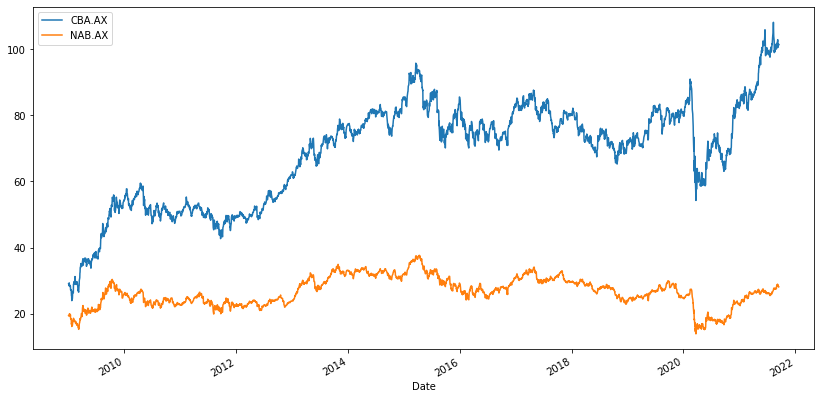

In [9]:
# df.Close.plot()
df.Close.plot(figsize=(14,7)) # please search google
plt.savefig("nab_cba.pdf")